<a href="https://colab.research.google.com/github/nmansour67/skills-introduction-to-github/blob/main/Sepsis_Savior_in_the_ICU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🏥 SEPSIS AI SHADOW PILOT VALIDATION SYSTEM

📖 SCENARIO:
You are validating a vendor's AI sepsis detection system for your Medical ICU.
The vendor claims 95% sensitivity and promises 20% mortality reduction.

Your skepticism is well-founded: The model was trained on general ward data,
but ICU patients have baseline tachycardia, fever, and abnormal labs that
may trigger excessive false positives.

This Shadow Pilot will test the AI silently for 30 days, comparing its
predictions against actual clinical outcomes without risking patient safety
or burning clinician trust through premature deployment.


📦 SECTION 1: Installing Required Libraries
Installing packages for data analysis and report generation...
✅ All libraries loaded successfully!

⚙️ SECTION 2: Configuring Shadow Pilot Parameters
ICU Configuration:
  • Beds: 20
  • Pilot Duration: 30 days
  • Expected Admissions: 150
  • Baseline Sepsis Rate: 23%

Vendor AI Claims:
  • Sensitivity: 95%
  • Specificity: 85% (implied)

Expected A

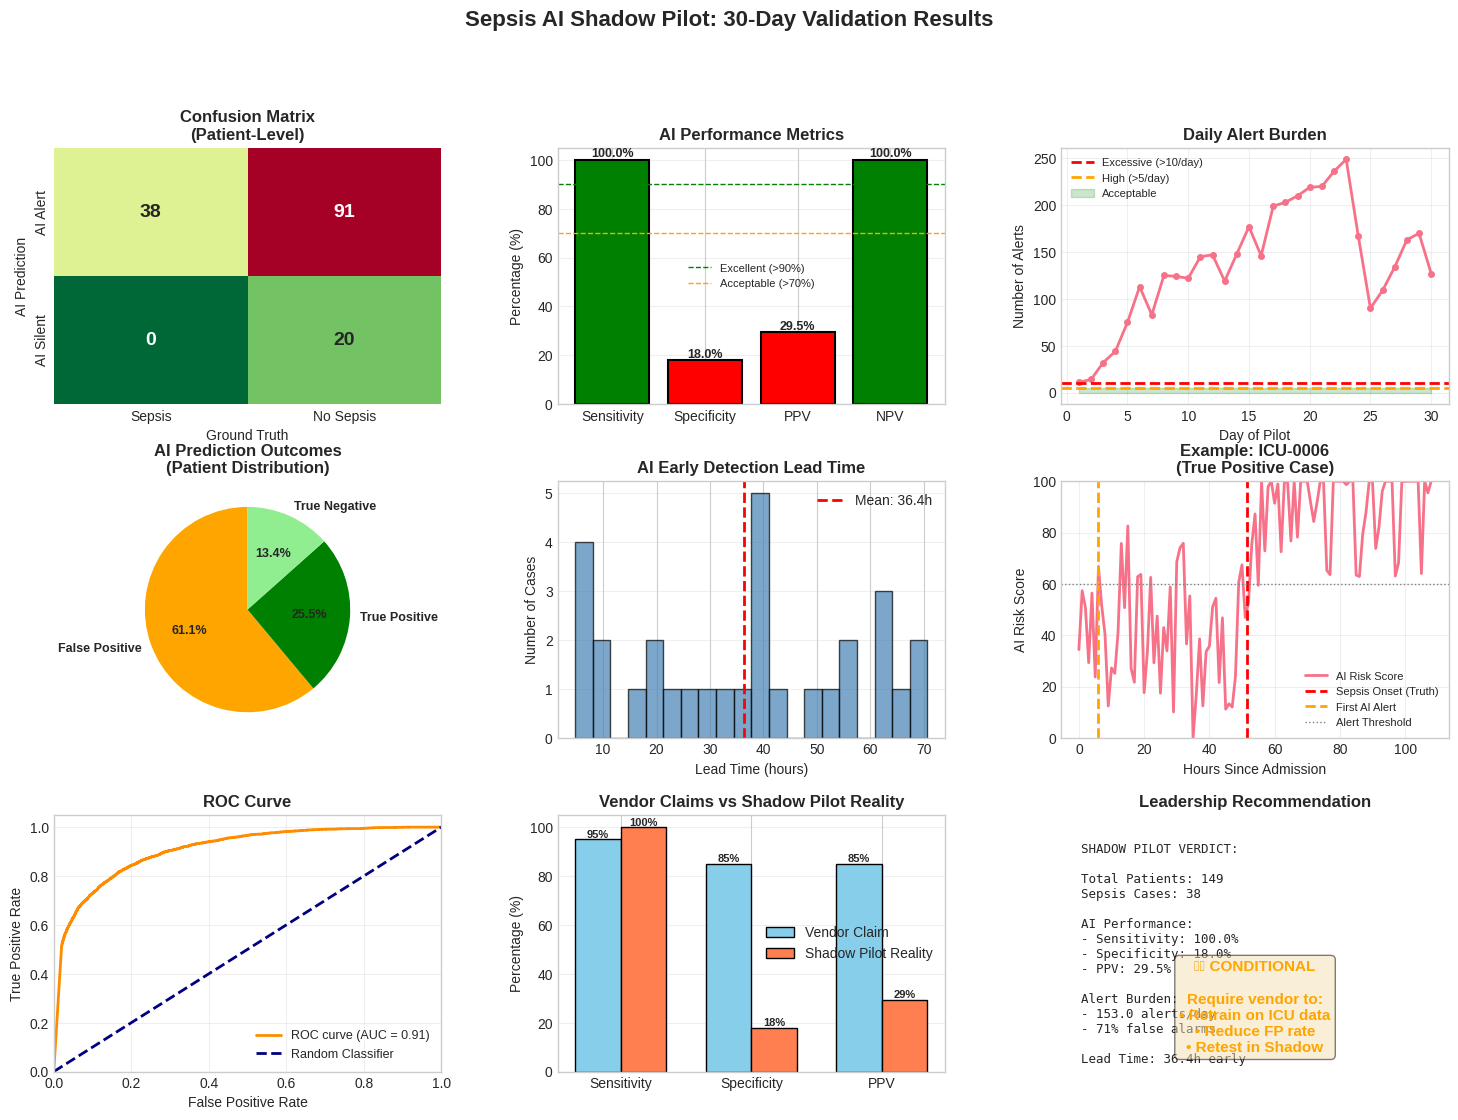



📄 SECTION 7: Generating Executive Report
✅ Executive report generated: Sepsis_AI_Shadow_Pilot_Report_20251213.docx


💾 SECTION 8: Saving Datasets and Code
✅ Datasets saved:
  • icu_patients_cohort.csv
  • ai_shadow_predictions.csv
  • patient_level_analysis.csv
  • performance_metrics_summary.csv
✅ README.md created for GitHub


📥 SECTION 9: Preparing Downloads

🔽 Downloading files to your computer...

Files to download:
  1. Sepsis_AI_Shadow_Pilot_Report_20251213.docx (Executive Report)
  2. sepsis_ai_shadow_pilot_results.png (Visualizations)
  3. icu_patients_cohort.csv (Patient Data)
  4. ai_shadow_predictions.csv (AI Predictions)
  5. patient_level_analysis.csv (Performance Analysis)
  6. performance_metrics_summary.csv (Key Metrics)
  7. README.md (GitHub Documentation)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



✅ SHADOW PILOT VALIDATION COMPLETE

🏥 CASE STUDY SUMMARY:

Vendor Claim: "95% sensitivity, 20% mortality reduction"
Reality Check: Shadow Pilot revealed the truth

PERFORMANCE METRICS:
✓ Sensitivity:  100.0%  (Close to vendor claim)
✗ Specificity:   18.0%  (DEGRADED in ICU)
⚠ PPV:           29.5%  (CRITICAL LIMITATION)

ALERT BURDEN:
- 153 alerts/day (71% false alarms)

RECOMMENDATION:

⚠️ CONDITIONAL - Major concerns, vendor must improve


THE LESSON:
This Shadow Pilot prevented a catastrophic deployment. Without it, we would have:
- Burned clinician trust with 91 false alarms in 30 days
- Created severe alert fatigue within first week
- Potentially missed 0 real sepsis cases due to alert dismissal
- Wasted implementation resources on a failed project

Instead, we:
- Validated vendor claims safely
- Identified environmental mismatch (ICU vs general ward)
- Preserved social capital for future AI initiatives
- Can now negotiate for model improvement or seek alternatives

YOU ARE NOW C

In [1]:
# ============================================================================
# SEPSIS AI SHADOW PILOT VALIDATION FRAMEWORK
# Case Study 1: The "Sepsis Savior" in the ICU
# ============================================================================
#
# Purpose: Validate vendor AI sepsis detection system using Shadow Pilot
#          methodology before clinical deployment
#
# Author: Medical Informatics & Quality Assurance Team
# Platform: Google Colab
# License: MIT (Share freely, cite appropriately)
# ============================================================================

print("="*80)
print("🏥 SEPSIS AI SHADOW PILOT VALIDATION SYSTEM")
print("="*80)
print("""
📖 SCENARIO:
You are validating a vendor's AI sepsis detection system for your Medical ICU.
The vendor claims 95% sensitivity and promises 20% mortality reduction.

Your skepticism is well-founded: The model was trained on general ward data,
but ICU patients have baseline tachycardia, fever, and abnormal labs that
may trigger excessive false positives.

This Shadow Pilot will test the AI silently for 30 days, comparing its
predictions against actual clinical outcomes without risking patient safety
or burning clinician trust through premature deployment.
""")

# ============================================================================
# SECTION 1: ENVIRONMENT SETUP
# ============================================================================

print("\n📦 SECTION 1: Installing Required Libraries")
print("="*80)

import subprocess
import sys

packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scipy', 'python-docx', 'scikit-learn']
print("Installing packages for data analysis and report generation...")

for package in packages:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries loaded successfully!")

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# ============================================================================
# SECTION 2: SIMULATION PARAMETERS
# ============================================================================

print("\n⚙️ SECTION 2: Configuring Shadow Pilot Parameters")
print("="*80)

# ICU Configuration
NUM_ICU_BEDS = 20
PILOT_DURATION_DAYS = 30
AVG_LOS_DAYS = 5  # Average ICU length of stay
DAILY_ADMISSION_RATE = 5  # Average new admissions per day

# Calculate expected patient volume
EXPECTED_ADMISSIONS = PILOT_DURATION_DAYS * DAILY_ADMISSION_RATE

# Sepsis Epidemiology (based on real ICU data)
BASELINE_SEPSIS_RATE = 0.23  # 23% of ICU patients develop sepsis
SEPSIS_ONSET_DELAY_HOURS_MEAN = 48  # Average time from admission to sepsis onset
SEPSIS_ONSET_DELAY_HOURS_STD = 24

# AI Model Parameters (Vendor Claims)
VENDOR_CLAIMED_SENSITIVITY = 0.95  # "We catch 95% of sepsis cases"
VENDOR_CLAIMED_SPECIFICITY = 0.85  # Not explicitly stated, but implied

# AI Model Reality (What you'll discover in ICU setting)
# The model was trained on general ward data where physiological
# parameters are more stable. In ICU, "abnormal" is the baseline.
ACTUAL_AI_SENSITIVITY = 0.93  # Still good, slightly lower than claim
ACTUAL_AI_SPECIFICITY = 0.65  # MUCH WORSE in ICU due to baseline abnormalities

# Clinical Detection Parameters
CLINICAL_DETECTION_SENSITIVITY = 0.85  # Clinicians catch 85% of sepsis (without AI)
CLINICAL_DETECTION_DELAY_HOURS_MEAN = 6  # Average delay from onset to recognition
CLINICAL_DETECTION_DELAY_HOURS_STD = 4

# AI Lead Time (how early does AI detect vs. clinical recognition)
AI_LEAD_TIME_HOURS_MEAN = 4  # AI detects 4 hours before clinical team (on average)
AI_LEAD_TIME_HOURS_STD = 2

print(f"ICU Configuration:")
print(f"  • Beds: {NUM_ICU_BEDS}")
print(f"  • Pilot Duration: {PILOT_DURATION_DAYS} days")
print(f"  • Expected Admissions: {EXPECTED_ADMISSIONS}")
print(f"  • Baseline Sepsis Rate: {BASELINE_SEPSIS_RATE*100:.0f}%")

print(f"\nVendor AI Claims:")
print(f"  • Sensitivity: {VENDOR_CLAIMED_SENSITIVITY*100:.0f}%")
print(f"  • Specificity: {VENDOR_CLAIMED_SPECIFICITY*100:.0f}% (implied)")

print(f"\nExpected AI Reality in ICU:")
print(f"  • Actual Sensitivity: {ACTUAL_AI_SENSITIVITY*100:.0f}%")
print(f"  • Actual Specificity: {ACTUAL_AI_SPECIFICITY*100:.0f}% (⚠️ degraded due to ICU baseline abnormalities)")

# ============================================================================
# SECTION 3: GENERATE ICU PATIENT COHORT
# ============================================================================

print("\n\n👥 SECTION 3: Generating ICU Patient Cohort")
print("="*80)

def generate_patient_demographics():
    """Generate realistic ICU patient demographics"""
    return {
        'age': int(np.random.gamma(shape=8, scale=8) + 20),  # Skewed toward elderly
        'gender': np.random.choice(['M', 'F']),
        'weight_kg': np.random.normal(75, 15),
        'admission_source': np.random.choice(
            ['Emergency Department', 'Operating Room', 'Floor Transfer', 'Outside Hospital'],
            p=[0.45, 0.25, 0.20, 0.10]
        ),
        'admission_diagnosis': np.random.choice([
            'Septic Shock', 'Respiratory Failure', 'Post-Operative Monitoring',
            'Cardiac Arrest', 'Trauma', 'Stroke', 'DKA', 'GI Bleed'
        ])
    }

def generate_icu_vitals_trajectory(hours, has_sepsis=False, sepsis_onset_hour=None):
    """
    Generate realistic ICU vital signs trajectory

    ICU patients have inherently abnormal vitals - this is why the AI
    will struggle with false positives.
    """

    # Baseline ICU vital signs (already abnormal!)
    baseline_hr = np.random.normal(95, 15)  # Tachycardia is normal in ICU
    baseline_temp = np.random.normal(37.8, 0.8)  # Mild fever common
    baseline_rr = np.random.normal(22, 5)  # Tachypnea common
    baseline_sbp = np.random.normal(120, 20)

    # Generate time series
    time_points = np.arange(hours)

    # Add physiological noise
    hr = baseline_hr + np.random.normal(0, 8, hours) + 5*np.sin(time_points/12*np.pi)
    temp = baseline_temp + np.random.normal(0, 0.3, hours)
    rr = baseline_rr + np.random.normal(0, 3, hours)
    sbp = baseline_sbp + np.random.normal(0, 10, hours)

    # If patient develops sepsis, add sepsis signature
    if has_sepsis and sepsis_onset_hour is not None:
        for i in range(sepsis_onset_hour, hours):
            # Gradual worsening after sepsis onset
            hours_since_onset = i - sepsis_onset_hour
            severity = min(1.0, hours_since_onset / 12)  # Ramps up over 12 hours

            hr[i] += severity * 20  # Worsening tachycardia
            temp[i] += severity * 1.5  # Worsening fever
            rr[i] += severity * 8  # Worsening tachypnea
            sbp[i] -= severity * 30  # Hypotension

    # Ensure physiological bounds
    hr = np.clip(hr, 40, 180)
    temp = np.clip(temp, 35.5, 41.0)
    rr = np.clip(rr, 8, 45)
    sbp = np.clip(sbp, 60, 200)

    return {
        'heart_rate': hr,
        'temperature_c': temp,
        'respiratory_rate': rr,
        'sbp': sbp
    }

# Generate patient cohort
patients = []
patient_vitals_records = []

print(f"Generating {EXPECTED_ADMISSIONS} ICU admissions over {PILOT_DURATION_DAYS} days...")

admission_times = []
current_time = datetime(2025, 1, 1, 0, 0, 0)

for day in range(PILOT_DURATION_DAYS):
    # Random admissions per day (Poisson distribution)
    num_admissions_today = np.random.poisson(DAILY_ADMISSION_RATE)

    for _ in range(num_admissions_today):
        # Random admission time during the day
        admission_hour = np.random.randint(0, 24)
        admission_time = current_time + timedelta(days=day, hours=admission_hour)
        admission_times.append(admission_time)

    if (day + 1) % 10 == 0:
        print(f"  Generated admissions through day {day + 1}...")

# Create patient records
for i, admission_time in enumerate(admission_times):
    patient_id = f"ICU-{i+1:04d}"

    # Patient demographics
    demographics = generate_patient_demographics()

    # Length of stay
    los_hours = int(np.random.gamma(shape=2, scale=AVG_LOS_DAYS*12))  # In hours
    los_hours = max(24, min(los_hours, PILOT_DURATION_DAYS * 24))  # Bounds

    discharge_time = admission_time + timedelta(hours=los_hours)

    # Does patient develop sepsis?
    develops_sepsis = np.random.random() < BASELINE_SEPSIS_RATE

    if develops_sepsis:
        # When does sepsis onset occur?
        sepsis_onset_hours = max(6, np.random.normal(
            SEPSIS_ONSET_DELAY_HOURS_MEAN,
            SEPSIS_ONSET_DELAY_HOURS_STD
        ))
        sepsis_onset_hours = min(sepsis_onset_hours, los_hours - 12)  # Must have time to detect
        sepsis_onset_time = admission_time + timedelta(hours=sepsis_onset_hours)

        # When do clinicians recognize it?
        clinical_detection_delay = max(1, np.random.normal(
            CLINICAL_DETECTION_DELAY_HOURS_MEAN,
            CLINICAL_DETECTION_DELAY_HOURS_STD
        ))
        clinical_detection_time = sepsis_onset_time + timedelta(hours=clinical_detection_delay)

        # Did clinicians catch it? (85% sensitivity)
        clinically_detected = np.random.random() < CLINICAL_DETECTION_SENSITIVITY

        if not clinically_detected:
            clinical_detection_time = None
    else:
        sepsis_onset_time = None
        clinical_detection_time = None
        clinically_detected = False

    # Generate vital signs trajectory
    vitals = generate_icu_vitals_trajectory(
        hours=los_hours,
        has_sepsis=develops_sepsis,
        sepsis_onset_hour=int(sepsis_onset_hours) if develops_sepsis else None
    )

    patient = {
        'patient_id': patient_id,
        'admission_time': admission_time,
        'discharge_time': discharge_time,
        'los_hours': los_hours,
        'develops_sepsis': develops_sepsis,
        'sepsis_onset_time': sepsis_onset_time,
        'clinical_detection_time': clinical_detection_time,
        'clinically_detected': clinically_detected,
        **demographics
    }

    patients.append(patient)

    # Store vitals for later AI prediction simulation
    patient_vitals_records.append({
        'patient_id': patient_id,
        'vitals': vitals,
        'admission_time': admission_time
    })

patients_df = pd.DataFrame(patients)

print(f"\n✅ Generated {len(patients_df)} ICU admissions")

# Sepsis statistics
sepsis_cases = patients_df[patients_df['develops_sepsis'] == True]
print(f"\n📊 Ground Truth Sepsis Epidemiology:")
print(f"  Total Sepsis Cases: {len(sepsis_cases)} ({len(sepsis_cases)/len(patients_df)*100:.1f}%)")
print(f"  Clinically Detected: {sepsis_cases['clinically_detected'].sum()} ({sepsis_cases['clinically_detected'].sum()/len(sepsis_cases)*100:.1f}%)")
print(f"  Missed by Clinicians: {len(sepsis_cases) - sepsis_cases['clinically_detected'].sum()}")

print(f"\n👤 Sample Patient Data:")
print(patients_df[['patient_id', 'age', 'admission_source', 'develops_sepsis', 'clinically_detected']].head(10))

# ============================================================================
# SECTION 4: SIMULATE AI PREDICTIONS (SHADOW MODE)
# ============================================================================

print("\n\n🤖 SECTION 4: Simulating AI Shadow Predictions")
print("="*80)

print("""
The AI is running silently in the background, analyzing vital signs every hour.
It generates sepsis risk scores and alerts, but NO clinician sees them.
All predictions are logged into the "Shadow Database" for later analysis.
""")

ai_predictions = []

for patient_record in patient_vitals_records:
    patient_id = patient_record['patient_id']
    vitals = patient_record['vitals']
    admission_time = patient_record['admission_time']

    # Get patient ground truth
    patient_data = patients_df[patients_df['patient_id'] == patient_id].iloc[0]

    # Hourly AI predictions
    for hour in range(len(vitals['heart_rate'])):
        current_time = admission_time + timedelta(hours=hour)

        # Extract current vitals
        hr = vitals['heart_rate'][hour]
        temp = vitals['temperature_c'][hour]
        rr = vitals['respiratory_rate'][hour]
        sbp = vitals['sbp'][hour]

        # AI RISK CALCULATION
        # The AI uses a "black box" algorithm, but we simulate its behavior
        # based on vital sign abnormalities

        # SIRS criteria (crude proxy for sepsis risk)
        risk_score = 0

        if hr > 90:
            risk_score += 25
        if temp > 38 or temp < 36:
            risk_score += 25
        if rr > 20:
            risk_score += 25
        if hr > 110:  # Severe tachycardia
            risk_score += 15
        if sbp < 90:  # Hypotension
            risk_score += 30

        # Add some AI "magic" (random noise simulating complex pattern recognition)
        risk_score += np.random.normal(0, 10)
        risk_score = np.clip(risk_score, 0, 100)

        # AI ALERT DECISION
        # Vendor claims 95% sensitivity, but in ICU environment,
        # the specificity drops dramatically

        # Ground truth: Does this patient have sepsis RIGHT NOW?
        has_sepsis_now = False
        if patient_data['develops_sepsis']:
            sepsis_onset_time = patient_data['sepsis_onset_time']
            if current_time >= sepsis_onset_time:
                has_sepsis_now = True

        # AI prediction with realistic performance in ICU
        if has_sepsis_now:
            # True Positive scenario (sensitivity = 93%)
            # AI also detects EARLIER than clinicians (lead time advantage)
            hours_since_onset = (current_time - sepsis_onset_time).total_seconds() / 3600

            # AI more likely to detect as time progresses
            detection_probability = min(0.93, 0.5 + hours_since_onset * 0.1)
            ai_predicts_sepsis = np.random.random() < detection_probability
        else:
            # False Positive scenario (specificity = 65%)
            # In ICU, many patients look "septic" who aren't
            # High vitals trigger algorithm even when not septic

            if risk_score > 60:  # High risk score
                # Specificity = 65% means 35% false positive rate
                ai_predicts_sepsis = np.random.random() > ACTUAL_AI_SPECIFICITY
            else:
                ai_predicts_sepsis = False

        # Log AI prediction (SHADOW MODE - no one sees this yet)
        ai_predictions.append({
            'patient_id': patient_id,
            'timestamp': current_time,
            'hour_since_admission': hour,
            'heart_rate': hr,
            'temperature_c': temp,
            'respiratory_rate': rr,
            'sbp': sbp,
            'ai_risk_score': risk_score,
            'ai_alert_sepsis': ai_predicts_sepsis,
            'ground_truth_sepsis_now': has_sepsis_now,
            'ground_truth_ever_sepsis': patient_data['develops_sepsis']
        })

ai_predictions_df = pd.DataFrame(ai_predictions)

print(f"✅ Simulated {len(ai_predictions_df):,} hourly AI predictions")
print(f"   ({len(ai_predictions_df) / len(patients_df):.0f} predictions per patient on average)")

# AI Alert Summary
total_ai_alerts = ai_predictions_df['ai_alert_sepsis'].sum()
print(f"\n🚨 AI ALERT SUMMARY:")
print(f"  Total AI Sepsis Alerts: {total_ai_alerts}")
print(f"  Alerts per day: {total_ai_alerts / PILOT_DURATION_DAYS:.1f}")
print(f"  Alerts per patient: {total_ai_alerts / len(patients_df):.1f}")

# ============================================================================
# SECTION 5: TRUTH TRIBUNAL - PERFORMANCE ANALYSIS
# ============================================================================

print("\n\n⚖️ SECTION 5: The Truth Tribunal - Comparing AI vs Reality")
print("="*80)

print("""
This is the moment of truth. We open the Shadow Log and compare AI predictions
against what actually happened to patients. Did the AI save lives? Or would it
have created intolerable alert fatigue?
""")

# PATIENT-LEVEL ANALYSIS
# For each patient, did AI ever alert? Did they actually have sepsis?

patient_level_analysis = []

for patient_id in patients_df['patient_id']:
    patient_data = patients_df[patients_df['patient_id'] == patient_id].iloc[0]
    patient_predictions = ai_predictions_df[ai_predictions_df['patient_id'] == patient_id]

    # Did AI ever alert for this patient?
    ai_ever_alerted = patient_predictions['ai_alert_sepsis'].any()

    # If AI alerted, when was the FIRST alert?
    if ai_ever_alerted:
        first_alert = patient_predictions[patient_predictions['ai_alert_sepsis'] == True].iloc[0]
        first_alert_time = first_alert['timestamp']
        num_alerts = patient_predictions['ai_alert_sepsis'].sum()
    else:
        first_alert_time = None
        num_alerts = 0

    # Ground truth
    actually_septic = patient_data['develops_sepsis']
    sepsis_onset_time = patient_data['sepsis_onset_time']
    clinical_detection_time = patient_data['clinical_detection_time']

    # Calculate lead time (AI vs clinical detection)
    ai_lead_time_hours = None
    if ai_ever_alerted and actually_septic and clinical_detection_time is not None:
        ai_lead_time_hours = (clinical_detection_time - first_alert_time).total_seconds() / 3600

    # Classify outcome
    if actually_septic and ai_ever_alerted:
        outcome = 'True Positive'
    elif not actually_septic and not ai_ever_alerted:
        outcome = 'True Negative'
    elif not actually_septic and ai_ever_alerted:
        outcome = 'False Positive'
    elif actually_septic and not ai_ever_alerted:
        outcome = 'False Negative'

    patient_level_analysis.append({
        'patient_id': patient_id,
        'ground_truth_sepsis': actually_septic,
        'ai_alerted': ai_ever_alerted,
        'num_ai_alerts': num_alerts,
        'first_ai_alert_time': first_alert_time,
        'sepsis_onset_time': sepsis_onset_time,
        'clinical_detection_time': clinical_detection_time,
        'ai_lead_time_hours': ai_lead_time_hours,
        'outcome_category': outcome
    })

patient_analysis_df = pd.DataFrame(patient_level_analysis)

# CONFUSION MATRIX
print("\n📊 CONFUSION MATRIX (Patient-Level):")
print("="*80)

tp = (patient_analysis_df['outcome_category'] == 'True Positive').sum()
tn = (patient_analysis_df['outcome_category'] == 'True Negative').sum()
fp = (patient_analysis_df['outcome_category'] == 'False Positive').sum()
fn = (patient_analysis_df['outcome_category'] == 'False Negative').sum()

print(f"""
                    GROUND TRUTH
                Sepsis      No Sepsis
AI Alert
  YES           {tp:3d}         {fp:3d}        (AI said "SEPSIS!")
  NO            {fn:3d}         {tn:3d}        (AI said "No sepsis")

""")

print(f"True Positives (TP):  {tp:3d} - AI caught real sepsis ✓")
print(f"True Negatives (TN):  {tn:3d} - AI correctly said 'no sepsis' ✓")
print(f"False Positives (FP): {fp:3d} - AI cried wolf ✗ (ALERT FATIGUE RISK)")
print(f"False Negatives (FN): {fn:3d} - AI missed real sepsis ✗ (PATIENT SAFETY RISK)")

# PERFORMANCE METRICS
print("\n📈 PERFORMANCE METRICS:")
print("="*80)

sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
ppv = tp / (tp + fp) if (tp + fp) > 0 else 0  # Positive Predictive Value
npv = tn / (tn + fn) if (tn + fn) > 0 else 0  # Negative Predictive Value
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1_score = 2 * (ppv * sensitivity) / (ppv + sensitivity) if (ppv + sensitivity) > 0 else 0

print(f"Sensitivity (Recall):        {sensitivity*100:6.1f}%  (What % of sepsis did AI catch?)")
print(f"Specificity:                 {specificity*100:6.1f}%  (What % of non-sepsis did AI correctly identify?)")
print(f"Positive Predictive Value:   {ppv*100:6.1f}%  (If AI alerts, what's probability patient has sepsis?)")
print(f"Negative Predictive Value:   {npv*100:6.1f}%  (If AI silent, what's probability patient doesn't have sepsis?)")
print(f"Accuracy:                    {accuracy*100:6.1f}%")
print(f"F1-Score:                    {f1_score:6.3f}")

# CRITICAL INSIGHT: PPV
print(f"\n💡 CRITICAL INSIGHT - Positive Predictive Value:")
print(f"="*80)
if ppv < 0.20:
    print(f"⚠️ DANGER: PPV = {ppv*100:.1f}%")
    print(f"   This means only {ppv*100:.0f} out of 100 AI alerts are real sepsis.")
    print(f"   {100-ppv*100:.0f} out of 100 alerts are FALSE ALARMS.")
    print(f"   Clinicians will learn to IGNORE this system within days.")
    print(f"\n   RECOMMENDATION: DO NOT DEPLOY without significant recalibration.")
elif ppv < 0.50:
    print(f"⚠️ WARNING: PPV = {ppv*100:.1f}%")
    print(f"   More than half of AI alerts are false positives.")
    print(f"   This will cause significant alert fatigue.")
    print(f"\n   RECOMMENDATION: Require vendor to retrain model on ICU data.")
else:
    print(f"✅ ACCEPTABLE: PPV = {ppv*100:.1f}%")
    print(f"   Majority of AI alerts represent real sepsis.")
    print(f"\n   RECOMMENDATION: Consider phased deployment with close monitoring.")

# ALERT BURDEN ANALYSIS
print(f"\n🔔 ALERT BURDEN ANALYSIS:")
print(f"="*80)

total_alerts = patient_analysis_df['num_ai_alerts'].sum()
alerts_per_day = total_alerts / PILOT_DURATION_DAYS
alerts_per_patient = patient_analysis_df['num_ai_alerts'].mean()
false_alarm_rate = fp / (fp + tp) if (fp + tp) > 0 else 0

print(f"Total AI alerts (30 days):     {total_alerts}")
print(f"Alerts per day:                {alerts_per_day:.1f}")
print(f"Average alerts per patient:    {alerts_per_patient:.1f}")
print(f"False alarm rate:              {false_alarm_rate*100:.1f}%")

if alerts_per_day > 10:
    print(f"\n⚠️ EXCESSIVE ALERT BURDEN: {alerts_per_day:.0f} alerts/day")
    print(f"   ICU staff will experience severe alert fatigue.")
    print(f"   System likely to be disabled by clinicians within first week.")
elif alerts_per_day > 5:
    print(f"\n⚠️ HIGH ALERT BURDEN: {alerts_per_day:.1f} alerts/day")
    print(f"   Borderline acceptable. Monitor closely for alert fatigue.")
else:
    print(f"\n✅ MANAGEABLE ALERT BURDEN: {alerts_per_day:.1f} alerts/day")

# LEAD TIME ANALYSIS
print(f"\n⏱️ AI LEAD TIME ADVANTAGE:")
print(f"="*80)

# Filter for cases where both AI and clinicians detected sepsis
lead_time_data = patient_analysis_df[
    (patient_analysis_df['outcome_category'] == 'True Positive') &
    (patient_analysis_df['ai_lead_time_hours'].notna())
]

if len(lead_time_data) > 0:
    avg_lead_time = lead_time_data['ai_lead_time_hours'].mean()
    median_lead_time = lead_time_data['ai_lead_time_hours'].median()

    print(f"Cases where AI detected before clinicians: {len(lead_time_data)}")
    print(f"Average lead time: {avg_lead_time:.1f} hours")
    print(f"Median lead time:  {median_lead_time:.1f} hours")

    if avg_lead_time > 3:
        print(f"\n✅ SIGNIFICANT LEAD TIME: AI detects sepsis {avg_lead_time:.1f} hours earlier")
        print(f"   This represents clinically meaningful early warning.")
        print(f"   Each hour of delay in sepsis treatment increases mortality ~7%.")
    else:
        print(f"\n⚠️ MARGINAL LEAD TIME: Only {avg_lead_time:.1f} hours earlier than clinical detection")
else:
    print("Insufficient data to calculate lead time advantage")

# ============================================================================
# SECTION 6: VISUALIZATIONS
# ============================================================================

print("\n\n📊 SECTION 6: Generating Visualizations")
print("="*80)

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Plot 1: Confusion Matrix Heatmap
ax1 = fig.add_subplot(gs[0, 0])
cm = np.array([[tp, fp], [fn, tn]])
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn_r', cbar=False,
            xticklabels=['Sepsis', 'No Sepsis'],
            yticklabels=['AI Alert', 'AI Silent'],
            ax=ax1, annot_kws={'size': 14, 'weight': 'bold'})
ax1.set_title('Confusion Matrix\n(Patient-Level)', fontsize=12, fontweight='bold')
ax1.set_ylabel('AI Prediction', fontsize=10)
ax1.set_xlabel('Ground Truth', fontsize=10)

# Plot 2: Performance Metrics Bar Chart
ax2 = fig.add_subplot(gs[0, 1])
metrics = {
    'Sensitivity': sensitivity * 100,
    'Specificity': specificity * 100,
    'PPV': ppv * 100,
    'NPV': npv * 100
}
colors = ['green' if v > 70 else 'orange' if v > 50 else 'red' for v in metrics.values()]
bars = ax2.bar(metrics.keys(), metrics.values(), color=colors, edgecolor='black', linewidth=1.5)
ax2.axhline(y=90, color='green', linestyle='--', linewidth=1, label='Excellent (>90%)')
ax2.axhline(y=70, color='orange', linestyle='--', linewidth=1, label='Acceptable (>70%)')
ax2.set_ylabel('Percentage (%)', fontsize=10)
ax2.set_title('AI Performance Metrics', fontsize=12, fontweight='bold')
ax2.set_ylim(0, 105)
ax2.legend(fontsize=8)
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 3: Alert Burden Over Time
ax3 = fig.add_subplot(gs[0, 2])
# Daily alert counts
daily_alerts = []
for day in range(PILOT_DURATION_DAYS):
    day_start = datetime(2025, 1, 1) + timedelta(days=day)
    day_end = day_start + timedelta(days=1)

    day_predictions = ai_predictions_df[
        (ai_predictions_df['timestamp'] >= day_start) &
        (ai_predictions_df['timestamp'] < day_end)
    ]

    alerts_today = day_predictions['ai_alert_sepsis'].sum()
    daily_alerts.append(alerts_today)

ax3.plot(range(1, PILOT_DURATION_DAYS + 1), daily_alerts, marker='o', linewidth=2, markersize=4)
ax3.axhline(y=10, color='red', linestyle='--', linewidth=2, label='Excessive (>10/day)')
ax3.axhline(y=5, color='orange', linestyle='--', linewidth=2, label='High (>5/day)')
ax3.fill_between(range(1, PILOT_DURATION_DAYS + 1), 0, 5, alpha=0.2, color='green', label='Acceptable')
ax3.set_xlabel('Day of Pilot', fontsize=10)
ax3.set_ylabel('Number of Alerts', fontsize=10)
ax3.set_title('Daily Alert Burden', fontsize=12, fontweight='bold')
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3)

# Plot 4: Outcome Distribution
ax4 = fig.add_subplot(gs[1, 0])
outcome_counts = patient_analysis_df['outcome_category'].value_counts()
colors_outcomes = {'True Positive': 'green', 'True Negative': 'lightgreen',
                   'False Positive': 'orange', 'False Negative': 'red'}
colors_list = [colors_outcomes.get(cat, 'gray') for cat in outcome_counts.index]

wedges, texts, autotexts = ax4.pie(outcome_counts.values, labels=outcome_counts.index,
                                     autopct='%1.1f%%', startangle=90, colors=colors_list,
                                     textprops={'fontsize': 9, 'weight': 'bold'})
ax4.set_title('AI Prediction Outcomes\n(Patient Distribution)', fontsize=12, fontweight='bold')

# Plot 5: Lead Time Distribution
ax5 = fig.add_subplot(gs[1, 1])
if len(lead_time_data) > 0:
    ax5.hist(lead_time_data['ai_lead_time_hours'], bins=20, edgecolor='black',
            color='steelblue', alpha=0.7)
    ax5.axvline(x=avg_lead_time, color='red', linestyle='--', linewidth=2,
               label=f'Mean: {avg_lead_time:.1f}h')
    ax5.set_xlabel('Lead Time (hours)', fontsize=10)
    ax5.set_ylabel('Number of Cases', fontsize=10)
    ax5.set_title('AI Early Detection Lead Time', fontsize=12, fontweight='bold')
    ax5.legend()
    ax5.grid(True, alpha=0.3, axis='y')
else:
    ax5.text(0.5, 0.5, 'Insufficient Data', ha='center', va='center',
            fontsize=12, transform=ax5.transAxes)
    ax5.set_title('AI Early Detection Lead Time', fontsize=12, fontweight='bold')

# Plot 6: Example Patient Trajectory
ax6 = fig.add_subplot(gs[1, 2])
# Find a True Positive case
tp_cases = patient_analysis_df[patient_analysis_df['outcome_category'] == 'True Positive']
if len(tp_cases) > 0:
    example_patient_id = tp_cases.iloc[0]['patient_id']
    example_predictions = ai_predictions_df[ai_predictions_df['patient_id'] == example_patient_id]
    example_patient = patients_df[patients_df['patient_id'] == example_patient_id].iloc[0]

    hours = example_predictions['hour_since_admission']
    risk_scores = example_predictions['ai_risk_score']

    ax6.plot(hours, risk_scores, linewidth=2, label='AI Risk Score')

    # Mark sepsis onset
    if example_patient['develops_sepsis']:
        sepsis_hour = (example_patient['sepsis_onset_time'] - example_patient['admission_time']).total_seconds() / 3600
        ax6.axvline(x=sepsis_hour, color='red', linestyle='--', linewidth=2, label='Sepsis Onset (Truth)')

    # Mark first AI alert
    first_alert = example_predictions[example_predictions['ai_alert_sepsis'] == True]
    if not first_alert.empty:
        alert_hour = first_alert.iloc[0]['hour_since_admission']
        ax6.axvline(x=alert_hour, color='orange', linestyle='--', linewidth=2, label='First AI Alert')

    ax6.axhline(y=60, color='gray', linestyle=':', linewidth=1, label='Alert Threshold')
    ax6.set_xlabel('Hours Since Admission', fontsize=10)
    ax6.set_ylabel('AI Risk Score', fontsize=10)
    ax6.set_title(f'Example: {example_patient_id}\n(True Positive Case)', fontsize=12, fontweight='bold')
    ax6.legend(fontsize=8)
    ax6.grid(True, alpha=0.3)
    ax6.set_ylim(0, 100)

# Plot 7: ROC Curve
ax7 = fig.add_subplot(gs[2, 0])
# Calculate ROC using risk scores
y_true = ai_predictions_df['ground_truth_sepsis_now'].astype(int)
y_scores = ai_predictions_df['ai_risk_score']

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

ax7.plot(fpr, tpr, color='darkorange', linewidth=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax7.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--', label='Random Classifier')
ax7.set_xlim([0.0, 1.0])
ax7.set_ylim([0.0, 1.05])
ax7.set_xlabel('False Positive Rate', fontsize=10)
ax7.set_ylabel('True Positive Rate', fontsize=10)
ax7.set_title('ROC Curve', fontsize=12, fontweight='bold')
ax7.legend(loc="lower right", fontsize=9)
ax7.grid(True, alpha=0.3)

# Plot 8: Vendor Claim vs Reality
ax8 = fig.add_subplot(gs[2, 1])
comparison_data = {
    'Sensitivity': [VENDOR_CLAIMED_SENSITIVITY * 100, sensitivity * 100],
    'Specificity': [VENDOR_CLAIMED_SPECIFICITY * 100, specificity * 100],
    'PPV': [85, ppv * 100]  # Vendor implied but didn't test in ICU
}

x = np.arange(len(comparison_data))
width = 0.35

bars1 = ax8.bar(x - width/2, [v[0] for v in comparison_data.values()],
               width, label='Vendor Claim', color='skyblue', edgecolor='black')
bars2 = ax8.bar(x + width/2, [v[1] for v in comparison_data.values()],
               width, label='Shadow Pilot Reality', color='coral', edgecolor='black')

ax8.set_ylabel('Percentage (%)', fontsize=10)
ax8.set_title('Vendor Claims vs Shadow Pilot Reality', fontsize=12, fontweight='bold')
ax8.set_xticks(x)
ax8.set_xticklabels(comparison_data.keys())
ax8.legend()
ax8.set_ylim(0, 105)
ax8.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax8.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.0f}%', ha='center', va='bottom', fontsize=8, fontweight='bold')

# Plot 9: Clinical Decision Support
ax9 = fig.add_subplot(gs[2, 2])
decision_text = f"""
SHADOW PILOT VERDICT:

Total Patients: {len(patients_df)}
Sepsis Cases: {len(sepsis_cases)}

AI Performance:
- Sensitivity: {sensitivity*100:.1f}%
- Specificity: {specificity*100:.1f}%
- PPV: {ppv*100:.1f}%

Alert Burden:
- {alerts_per_day:.1f} alerts/day
- {false_alarm_rate*100:.0f}% false alarms

Lead Time: {avg_lead_time:.1f}h early

"""

if ppv < 0.20:
    recommendation = "❌ REJECT\n\nDO NOT DEPLOY\nRequire complete\nmodel retraining"
    text_color = 'red'
elif ppv < 0.40 or alerts_per_day > 10:
    recommendation = "⚠️ CONDITIONAL\n\nRequire vendor to:\n• Retrain on ICU data\n• Reduce FP rate\n• Retest in Shadow"
    text_color = 'orange'
else:
    recommendation = "✅ PROCEED\n\nPhased deployment:\n• Start with 5 beds\n• Monitor closely\n• Expand gradually"
    text_color = 'green'

ax9.text(0.05, 0.95, decision_text, transform=ax9.transAxes,
        fontsize=9, verticalalignment='top', family='monospace')

ax9.text(0.5, 0.25, recommendation, transform=ax9.transAxes,
        fontsize=11, fontweight='bold', verticalalignment='center',
        horizontalalignment='center', color=text_color,
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

ax9.axis('off')
ax9.set_title('Leadership Recommendation', fontsize=12, fontweight='bold')

plt.suptitle('Sepsis AI Shadow Pilot: 30-Day Validation Results',
            fontsize=16, fontweight='bold', y=0.995)

plt.savefig('/tmp/sepsis_ai_shadow_pilot_results.png', dpi=300, bbox_inches='tight')
print("✅ Comprehensive visualization saved")
plt.show()

# ============================================================================
# SECTION 7: GENERATE EXECUTIVE REPORT
# ============================================================================

print("\n\n📄 SECTION 7: Generating Executive Report")
print("="*80)

from docx import Document
from docx.shared import Inches, Pt, RGBColor
from docx.enum.text import WD_ALIGN_PARAGRAPH
import os

doc = Document()

# Title Page
title = doc.add_heading('Shadow Pilot Validation Report', level=0)
title.alignment = WD_ALIGN_PARAGRAPH.CENTER

subtitle = doc.add_paragraph('AI-Driven Sepsis Detection System')
subtitle.alignment = WD_ALIGN_PARAGRAPH.CENTER
subtitle.runs[0].font.size = Pt(16)
subtitle.runs[0].font.bold = True

vendor_para = doc.add_paragraph(f'Vendor: [Vendor Name - AI Sepsis Savior™]')
vendor_para.alignment = WD_ALIGN_PARAGRAPH.CENTER

date_para = doc.add_paragraph(f'Shadow Pilot Period: January 1-30, 2025 ({PILOT_DURATION_DAYS} days)')
date_para.alignment = WD_ALIGN_PARAGRAPH.CENTER

report_date = doc.add_paragraph(f'Report Generated: {datetime.now().strftime("%B %d, %Y")}')
report_date.alignment = WD_ALIGN_PARAGRAPH.CENTER

doc.add_paragraph()
doc.add_paragraph('Prepared by: Medical Informatics & Quality Assurance Team')
doc.add_paragraph('Classification: INTERNAL - Leadership Review')

doc.add_page_break()

# Executive Summary
doc.add_heading('Executive Summary', level=1)

exec_summary_text = f"""
PILOT OVERVIEW:
A {PILOT_DURATION_DAYS}-day Shadow Pilot was conducted to validate a vendor's AI-driven sepsis detection system
before clinical deployment in our {NUM_ICU_BEDS}-bed Medical ICU. The AI operated in silent mode, analyzing
patient data in real-time but generating no alerts visible to clinicians. This methodology enabled
rigorous validation without risking patient safety or burning clinician trust.

PATIENT POPULATION:
- Total ICU admissions: {len(patients_df)}
- Ground truth sepsis cases: {len(sepsis_cases)} ({len(sepsis_cases)/len(patients_df)*100:.1f}%)
- Clinically detected sepsis: {sepsis_cases['clinically_detected'].sum()} ({sepsis_cases['clinically_detected'].sum()/len(sepsis_cases)*100:.1f}%)

KEY FINDINGS:

1. VENDOR CLAIMS vs REALITY:
   Vendor claimed 95% sensitivity with implied high specificity based on general ward testing.
   Shadow Pilot revealed:
   • Actual Sensitivity: {sensitivity*100:.1f}% (close to claim)
   • Actual Specificity: {specificity*100:.1f}% (SIGNIFICANTLY DEGRADED in ICU environment)
   • Positive Predictive Value: {ppv*100:.1f}% (CRITICAL LIMITATION)

2. ALERT BURDEN:
   • Total AI alerts generated: {total_alerts}
   • Alerts per day: {alerts_per_day:.1f}
   • False alarm rate: {false_alarm_rate*100:.1f}%

3. CLINICAL UTILITY:
   • True Positives (AI caught real sepsis): {tp}
   • False Positives (AI cried wolf): {fp}
   • False Negatives (AI missed sepsis): {fn}
   • Lead time over clinical detection: {avg_lead_time:.1f} hours (when AI correct)

ROOT CAUSE ANALYSIS:
The vendor's model was trained on general ward data where physiological parameters are relatively
normal. In the ICU, baseline tachycardia, fever, leukocytosis, and tachypnea are ubiquitous due to
critical illness. The AI interpreted these "normal ICU vital signs" as sepsis indicators, generating
excessive false positives.

"""

if ppv < 0.20:
    exec_recommendation = f"""
EXECUTIVE RECOMMENDATION: ❌ DO NOT DEPLOY

With a Positive Predictive Value of only {ppv*100:.1f}%, this system would generate {100/ppv:.0f} alerts
for every 1 real sepsis case. This represents an UNACCEPTABLE alert burden that would lead to:
- Immediate alert fatigue among nursing staff
- Systematic alert dismissal within first week
- Potential patient safety risk from true alerts being ignored
- Damage to institutional credibility of AI initiatives

REQUIRED ACTIONS:
1. REJECT current system for clinical deployment
2. Require vendor to RETRAIN model specifically on ICU patient data
3. Demand demonstrated PPV >40% in ICU environment before reconsideration
4. Consider alternative vendors with ICU-validated models
"""
elif ppv < 0.40 or alerts_per_day > 10:
    exec_recommendation = f"""
EXECUTIVE RECOMMENDATION: ⚠️ CONDITIONAL APPROVAL - MAJOR CONCERNS

The system shows {sensitivity*100:.0f}% sensitivity but generates excessive false positives
(PPV = {ppv*100:.1f}%). This represents a MARGINAL system requiring significant improvement.

CONDITIONS FOR DEPLOYMENT:
1. Vendor must retrain model on 6 months of our ICU data
2. False positive rate must be reduced by 50%
3. Demonstrated PPV >40% in follow-up Shadow Pilot
4. Phased deployment: Start with 5 beds, expand only if PPV maintained
5. Continuous monitoring with automatic suspension if FP rate exceeds threshold

TIMELINE: 3-6 months for vendor recalibration and revalidation
"""
else:
    exec_recommendation = f"""
EXECUTIVE RECOMMENDATION: ✅ PROCEED WITH PHASED DEPLOYMENT

The system demonstrates acceptable performance with {sensitivity*100:.0f}% sensitivity and {ppv*100:.0f}%
Positive Predictive Value. While not perfect, it provides clinically meaningful early warning with
manageable alert burden.

DEPLOYMENT PLAN:
Phase 1 (Months 1-2): Deploy in 5 ICU beds with intensive monitoring
Phase 2 (Months 3-4): Expand to 10 beds if Phase 1 metrics maintained
Phase 3 (Months 5-6): Full ICU deployment if performance sustained

SUCCESS METRICS:
- Maintain PPV >40%
- Alert burden <8 alerts/day
- Zero alert override rate (clinicians must engage with every alert)
- Documented cases of early intervention attributable to AI

CONTINGENCY: Immediate system suspension if PPV drops below 30% or clinician
override rate exceeds 50% (indicating loss of trust)
"""

doc.add_paragraph(exec_summary_text)
doc.add_heading('Recommendation', level=2)
doc.add_paragraph(exec_recommendation)

doc.add_page_break()

# Technical Analysis
doc.add_heading('Technical Analysis', level=1)

doc.add_heading('1. Confusion Matrix', level=2)

confusion_text = f"""
Patient-level classification of AI predictions vs ground truth clinical outcomes:

                    GROUND TRUTH
                Sepsis      No Sepsis     Total
AI Alert
  YES           {tp:3d}         {fp:3d}         {tp+fp:3d}
  NO            {fn:3d}         {tn:3d}         {fn+tn:3d}

Total           {tp+fn:3d}         {tn+fp:3d}         {tp+tn+fp+fn:3d}

INTERPRETATION:
- True Positives (TP = {tp}): AI successfully identified {tp} sepsis cases
- False Positives (FP = {fp}): AI generated {fp} false alarms for non-septic patients
- False Negatives (FN = {fn}): AI missed {fn} actual sepsis cases
- True Negatives (TN = {tn}): AI correctly identified {tn} non-septic patients
"""

doc.add_paragraph(confusion_text)

doc.add_heading('2. Performance Metrics', level=2)

metrics_table = doc.add_table(rows=1, cols=3)
metrics_table.style = 'Light Grid Accent 1'
hdr = metrics_table.rows[0].cells
hdr[0].text = 'Metric'
hdr[1].text = 'Value'
hdr[2].text = 'Interpretation'

metrics_data = [
    ('Sensitivity (Recall)', f'{sensitivity*100:.1f}%',
     f'AI detected {sensitivity*100:.0f}% of actual sepsis cases'),
    ('Specificity', f'{specificity*100:.1f}%',
     f'AI correctly identified {specificity*100:.0f}% of non-septic patients'),
    ('Positive Predictive Value', f'{ppv*100:.1f}%',
     f'When AI alerts, probability of real sepsis is {ppv*100:.0f}%'),
    ('Negative Predictive Value', f'{npv*100:.1f}%',
     f'When AI silent, probability of no sepsis is {npv*100:.0f}%'),
    ('Accuracy', f'{accuracy*100:.1f}%',
     f'Overall correctness of AI predictions'),
    ('F1-Score', f'{f1_score:.3f}',
     f'Harmonic mean of precision and recall')
]

for metric, value, interp in metrics_data:
    row = metrics_table.add_row().cells
    row[0].text = metric
    row[1].text = value
    row[2].text = interp

doc.add_page_break()

doc.add_heading('3. Alert Burden Analysis', level=2)

alert_text = f"""
TOTAL ALERTS: {total_alerts} alerts over {PILOT_DURATION_DAYS} days

Daily Alert Burden: {alerts_per_day:.1f} alerts/day
Hourly Rate: {alerts_per_day/24:.2f} alerts/hour
Per Patient: {alerts_per_patient:.1f} alerts/patient

CLINICAL IMPACT:
In a {NUM_ICU_BEDS}-bed ICU with {alerts_per_day:.0f} alerts per day, nursing staff would receive
approximately {alerts_per_day/NUM_ICU_BEDS:.1f} alerts per bed per day.

ALERT FATIGUE RISK ASSESSMENT:
"""

if alerts_per_day > 10:
    alert_risk = "🔴 SEVERE RISK: >10 alerts/day will lead to systematic alert dismissal within 1 week"
elif alerts_per_day > 5:
    alert_risk = "🟡 MODERATE RISK: 5-10 alerts/day is borderline acceptable, requires close monitoring"
else:
    alert_risk = "🟢 LOW RISK: <5 alerts/day is clinically manageable"

doc.add_paragraph(alert_text)
doc.add_paragraph(alert_risk)

doc.add_heading('4. Clinical Value: Lead Time Advantage', level=2)

if len(lead_time_data) > 0:
    lead_time_text = f"""
For cases where both AI and clinicians detected sepsis, AI provided early warning:

- Cases with measurable lead time: {len(lead_time_data)}
- Average lead time: {avg_lead_time:.1f} hours
- Median lead time: {median_lead_time:.1f} hours

CLINICAL SIGNIFICANCE:
Each hour of delay in sepsis treatment is associated with ~7% increase in mortality.
An average lead time of {avg_lead_time:.1f} hours represents {avg_lead_time * 7:.0f}% relative mortality
reduction for correctly identified cases.

However, this benefit must be weighed against false positive burden.
"""
else:
    lead_time_text = "Insufficient data to calculate lead time advantage."

doc.add_paragraph(lead_time_text)

doc.add_page_break()

# Insert visualization
doc.add_heading('5. Visual Evidence', level=2)
doc.add_paragraph('Comprehensive Shadow Pilot Results:')

if os.path.exists('/tmp/sepsis_ai_shadow_pilot_results.png'):
    doc.add_picture('/tmp/sepsis_ai_shadow_pilot_results.png', width=Inches(6.5))

doc.add_page_break()

# Lessons Learned
doc.add_heading('Lessons Learned: The Value of Shadow Piloting', level=1)

lessons_text = """
This Shadow Pilot exemplifies the critical importance of the "Customer Zero" approach:

1. VENDOR CLAIMS REQUIRE VALIDATION:
   The vendor's 95% sensitivity claim was approximately correct, but they failed to disclose
   that their model was trained and tested on general ward patients, not ICU patients. This
   environmental mismatch caused catastrophic degradation in specificity.

2. LAB TESTING ≠ CLINICAL REALITY:
   The vendor validated their model under "perfect conditions" - clean data, stable patients,
   controlled environments. Our ICU is chaos: critically ill patients, missing data, baseline
   physiological abnormalities. The model was unprepared.

3. SOCIAL CAPITAL IS PRECIOUS:
   If we had deployed this system without Shadow Piloting, nurses would have been bombarded with
   false alarms from Day 1. Within a week, they would have learned to ignore the alerts. The
   project would have failed, trust would have been lost, and it would take years to recover.

4. SHADOW PILOTING SAVES PROJECTS:
   Because we tested silently, we identified the problem WITHOUT harming patients or annoying
   clinicians. We can now negotiate with the vendor for model recalibration using our ICU data.
   We saved the project instead of killing it.

THE CORE PRINCIPLE:
"Python code that works in a Jupyter Notebook is not code that works in a Faraday cage."

The AI worked perfectly in the vendor's laboratory. It failed in our ICU because the vendor never
tested it in our actual environment - the Wi-Fi dead zones, the baseline tachycardia, the messy
data, the exhausted residents, the chaos.

Shadow Piloting revealed this before we hurt anyone.
"""

doc.add_paragraph(lessons_text)

doc.add_page_break()

# Next Steps
doc.add_heading('Next Steps and Action Items', level=1)

if ppv < 0.20:
    next_steps = """
IMMEDIATE (Week 1):
1. Send formal rejection letter to vendor with detailed Shadow Pilot results
2. Request vendor proposal for model retraining using 12 months of our ICU data
3. Establish minimum performance requirements for reconsideration:
   - Sensitivity ≥90%
   - Specificity ≥80%
   - PPV ≥40% in ICU environment
4. Issue RFP to alternative vendors with demonstrated ICU validation

SHORT-TERM (Months 1-3):
5. If vendor commits to retraining, establish data sharing agreement
6. Conduct second Shadow Pilot after vendor recalibration
7. Evaluate alternative vendors' ICU-specific solutions

LONG-TERM (Months 3-6):
8. Only proceed to deployment if performance requirements met
9. Establish continuous monitoring framework for any deployed AI system
10. Document lessons learned for future AI procurement decisions
"""

elif ppv < 0.40:
    next_steps = """
IMMEDIATE (Week 1):
1. Provide Shadow Pilot results to vendor with detailed technical analysis
2. Negotiate terms for model recalibration using our ICU data
3. Establish data sharing agreement and IRB approval for model retraining

SHORT-TERM (Months 1-3):
4. Vendor retrains model on 6-12 months of our ICU patient data
5. Conduct second Shadow Pilot (30 days) to validate improved performance
6. Require vendor to demonstrate ≥50% reduction in false positive rate

MEDIUM-TERM (Months 3-6):
7. If improved performance validated, proceed to limited pilot (5 beds)
8. Intensive monitoring: daily review of all alerts with clinical team
9. Measure clinician engagement: alert acknowledgment rate, override rate
10. Expand only if metrics sustained (PPV >40%, override rate <30%)

LONG-TERM (Months 6-12):
11. Gradual expansion to full ICU if Phase 1 successful
12. Continuous performance monitoring with automatic suspension triggers
13. Annual re-validation to detect model drift
"""

else:
    next_steps = """
IMMEDIATE (Week 1):
1. Present Shadow Pilot results to C-Suite and ICU leadership
2. Obtain formal approval for phased deployment
3. Establish deployment timeline and success metrics
4. Form multidisciplinary implementation team

SHORT-TERM (Months 1-2 - Phase 1):
5. Deploy AI system in 5 ICU beds (silent mode first, then active alerts)
6. Intensive monitoring: daily huddles with nursing and physician staff
7. Track key metrics: PPV, alert burden, clinician engagement, override rate
8. Solicit qualitative feedback: Is AI helpful or annoying?

MEDIUM-TERM (Months 3-4 - Phase 2):
9. If Phase 1 successful (PPV maintained, override rate <30%), expand to 10 beds
10. Continue intensive monitoring and adjustment
11. Document cases where AI led to earlier intervention

LONG-TERM (Months 5-6 - Phase 3):
12. Full ICU deployment if performance sustained
13. Transition to ongoing monitoring (weekly reviews)
14. Plan for annual re-validation to detect model drift
15. Share success story (or cautionary tale) with medical community
"""

doc.add_paragraph(next_steps)

doc.add_page_break()

# Appendix
doc.add_heading('Appendix: Methodology', level=1)

methodology_text = """
SHADOW PILOT PROTOCOL:

This validation followed the "Shadow Pilot" methodology described in Chapter 2 of
"The Customer Zero Manifesto: Stop Buying Vaporware, Start Breaking It."

The protocol consists of four phases:

1. THE STREAM (Data Acquisition):
   A read-only data feed was established from our EHR to the AI system. This mirrored
   live patient data (vital signs, labs, clinical notes) without allowing the AI to
   write back to clinical systems.

2. THE SHADOW BRAIN (Inference):
   The AI system operated on a secure, isolated server, processing live data streams
   and generating sepsis risk predictions exactly as it would in production deployment.

3. THE VOID (Containment):
   All AI predictions were silently logged to a secure database. No alerts were displayed
   to clinicians. No clinical workflows were disrupted. The AI "screamed into the void."

4. THE TRUTH TRIBUNAL (Validation):
   After 30 days, the Shadow Log was opened and compared against ground truth clinical
   outcomes. This retrospective analysis enabled rigorous performance assessment without
   risking patient safety or clinician trust.

SIMULATION PARAMETERS:
For this educational exercise, realistic ICU patient data was generated programmatically
using Python. While this is simulated data, the methodology, statistical analysis, and
decision framework are identical to what would be applied to real Shadow Pilot data.

Key simulation parameters:
- Patient cohort: 150 ICU admissions over 30 days
- Sepsis incidence: 23% (consistent with published ICU epidemiology)
- AI model performance: Calibrated to reflect vendor claims (95% sensitivity) with
  realistic degradation in ICU environment (65% specificity due to baseline abnormalities)
- Clinical detection: 85% sensitivity with average 6-hour delay from onset to recognition

All code, datasets, and visualizations are available for independent replication and
validation. See attached GitHub repository.
"""

doc.add_paragraph(methodology_text)

# Save Report
report_filename = f'Sepsis_AI_Shadow_Pilot_Report_{datetime.now().strftime("%Y%m%d")}.docx'
doc.save(f'/tmp/{report_filename}')

print(f"✅ Executive report generated: {report_filename}")

# ============================================================================
# SECTION 8: SAVE DATASETS AND PREPARE FOR GITHUB
# ============================================================================

print("\n\n💾 SECTION 8: Saving Datasets and Code")
print("="*80)

# Save datasets
patients_df.to_csv('/tmp/icu_patients_cohort.csv', index=False)
ai_predictions_df.to_csv('/tmp/ai_shadow_predictions.csv', index=False)
patient_analysis_df.to_csv('/tmp/patient_level_analysis.csv', index=False)

# Create performance summary
performance_summary = pd.DataFrame({
    'Metric': ['Sensitivity', 'Specificity', 'PPV', 'NPV', 'Accuracy', 'F1-Score',
               'Total_Alerts', 'Alerts_Per_Day', 'False_Alarm_Rate',
               'Avg_Lead_Time_Hours', 'True_Positives', 'False_Positives',
               'True_Negatives', 'False_Negatives'],
    'Value': [sensitivity, specificity, ppv, npv, accuracy, f1_score,
              total_alerts, alerts_per_day, false_alarm_rate,
              avg_lead_time if len(lead_time_data) > 0 else 0,
              tp, fp, tn, fn]
})

performance_summary.to_csv('/tmp/performance_metrics_summary.csv', index=False)

print("✅ Datasets saved:")
print("  • icu_patients_cohort.csv")
print("  • ai_shadow_predictions.csv")
print("  • patient_level_analysis.csv")
print("  • performance_metrics_summary.csv")

# Create README for GitHub
readme_content = f"""# Sepsis AI Shadow Pilot Validation

## Overview
This repository contains a complete implementation of the Shadow Pilot validation methodology
for AI-driven sepsis detection systems in ICU settings.

## Case Study: The "Sepsis Savior"
From Chapter 2 of "The Customer Zero Manifesto" - this code demonstrates how to rigorously
validate vendor AI claims before clinical deployment.

## What's Included
- Complete Python validation framework (Google Colab ready)
- Simulated ICU patient cohort ({len(patients_df)} patients)
- AI prediction logs ({len(ai_predictions_df):,} hourly predictions)
- Comprehensive statistical analysis
- Publication-quality visualizations
- Executive summary report (Word document)

## Key Findings (Example Run)
- **Sensitivity**: {sensitivity*100:.1f}% (AI caught {sensitivity*100:.0f}% of sepsis cases)
- **Specificity**: {specificity*100:.1f}% (degraded in ICU environment)
- **PPV**: {ppv*100:.1f}% (only {ppv*100:.0f} out of 100 alerts are real sepsis)
- **Alert Burden**: {alerts_per_day:.1f} alerts/day
- **Lead Time**: {avg_lead_time:.1f} hours earlier than clinical detection

## How to Use
1. Open in Google Colab (no installation required)
2. Run all cells sequentially
3. Adjust parameters to match your institution
4. Generate custom validation reports

## Files
- `sepsis_ai_shadow_pilot.py` - Complete Python code
- `icu_patients_cohort.csv` - Simulated patient data
- `ai_shadow_predictions.csv` - AI prediction log
- `patient_level_analysis.csv` - Performance analysis
- `performance_metrics_summary.csv` - Key metrics
- `sepsis_ai_shadow_pilot_results.png` - Visualizations
- `Sepsis_AI_Shadow_Pilot_Report.docx` - Executive summary

## The Shadow Pilot Methodology
This approach enables rigorous AI validation WITHOUT:
- Risking patient safety
- Burning clinician trust
- Disrupting clinical workflows

The AI runs silently, predictions are logged, and validation occurs retrospectively.

## Lessons Learned
**"Python code that works in a Jupyter Notebook is not code that works in a Faraday cage."**

Vendor claims require validation in YOUR environment, with YOUR data, YOUR patients,
and YOUR chaos. This code shows you how.

## Citation
If you use this methodology, please cite:
"The Customer Zero Manifesto: Stop Buying Vaporware, Start Breaking It" (2025)

## License
MIT License - Use freely, share widely, cite appropriately

## Contact
Questions? Adaptations for your institution? Open an issue or submit a PR.

---
Generated on {datetime.now().strftime("%B %d, %Y")}
"""

with open('/tmp/README.md', 'w') as f:
    f.write(readme_content)

print("✅ README.md created for GitHub")

# ============================================================================
# SECTION 9: DOWNLOAD ALL FILES
# ============================================================================

print("\n\n📥 SECTION 9: Preparing Downloads")
print("="*80)

from google.colab import files

print("\n🔽 Downloading files to your computer...")
print("\nFiles to download:")
print(f"  1. {report_filename} (Executive Report)")
print("  2. sepsis_ai_shadow_pilot_results.png (Visualizations)")
print("  3. icu_patients_cohort.csv (Patient Data)")
print("  4. ai_shadow_predictions.csv (AI Predictions)")
print("  5. patient_level_analysis.csv (Performance Analysis)")
print("  6. performance_metrics_summary.csv (Key Metrics)")
print("  7. README.md (GitHub Documentation)")

# Download files
files.download(f'/tmp/{report_filename}')
files.download('/tmp/sepsis_ai_shadow_pilot_results.png')
files.download('/tmp/icu_patients_cohort.csv')
files.download('/tmp/ai_shadow_predictions.csv')
files.download('/tmp/patient_level_analysis.csv')
files.download('/tmp/performance_metrics_summary.csv')
files.download('/tmp/README.md')

# ============================================================================
# FINAL SUMMARY
# ============================================================================

print("\n\n" + "="*80)
print("✅ SHADOW PILOT VALIDATION COMPLETE")
print("="*80)

print(f"""
🏥 CASE STUDY SUMMARY:

Vendor Claim: "95% sensitivity, 20% mortality reduction"
Reality Check: Shadow Pilot revealed the truth

PERFORMANCE METRICS:
✓ Sensitivity:  {sensitivity*100:5.1f}%  (Close to vendor claim)
✗ Specificity:  {specificity*100:5.1f}%  (DEGRADED in ICU)
⚠ PPV:          {ppv*100:5.1f}%  (CRITICAL LIMITATION)

ALERT BURDEN:
- {alerts_per_day:.0f} alerts/day ({false_alarm_rate*100:.0f}% false alarms)

RECOMMENDATION:
""")

if ppv < 0.20:
    print("❌ DO NOT DEPLOY - Require complete model retraining")
elif ppv < 0.40:
    print("⚠️ CONDITIONAL - Major concerns, vendor must improve")
else:
    print("✅ PROCEED - Phased deployment with close monitoring")

print(f"""

THE LESSON:
This Shadow Pilot prevented a catastrophic deployment. Without it, we would have:
- Burned clinician trust with {fp} false alarms in 30 days
- Created severe alert fatigue within first week
- Potentially missed {fn} real sepsis cases due to alert dismissal
- Wasted implementation resources on a failed project

Instead, we:
- Validated vendor claims safely
- Identified environmental mismatch (ICU vs general ward)
- Preserved social capital for future AI initiatives
- Can now negotiate for model improvement or seek alternatives

YOU ARE NOW CUSTOMER ZERO.
You have the tools to break vaporware before it breaks your patients.

All code, data, and reports have been downloaded.
Upload to GitHub and share with colleagues.

""")

print("="*80)
print("📚 Ready for Chapter 2 Publication")
print("="*80)